# Numerical Integration

This notebook will cover chapter 4. Numerical Integration of my ODE book.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

## 4.1 Euler method

The simplest numerical integration method is due to Euler. Given initial condition (t[0], x[0]) and ODE x' = F(t, x), we calculate the nth step as

t[n] = t[n-1] + h

x[n] = x[n-1] + F(t[n-1], x[n-1]) * h

for a given timestep 'h'

In [3]:
def euler_method(F, t_span, x0, n_steps):
    dim = len(x0)
    t_start, t_end = t_span[0], t_span[1]
    h = (t_end - t_start) / (n_steps - 1)

    t = np.linspace(t_start, t_end, n_steps)
    x = np.zeros((n_steps, dim))
    x[0] = x0

    for n in range(1, n_steps):
        x[n] = x[n-1] + h * F(t[n-1], x[n-1])

    return t, x

### Riccati equation

In [4]:
def riccati(t, x):
    return np.array([t**2 - x**2])

# Initial condition and time span
t_span = (0, 1)
t0, t_end = t_span
x0 = [1]
n_steps = 10

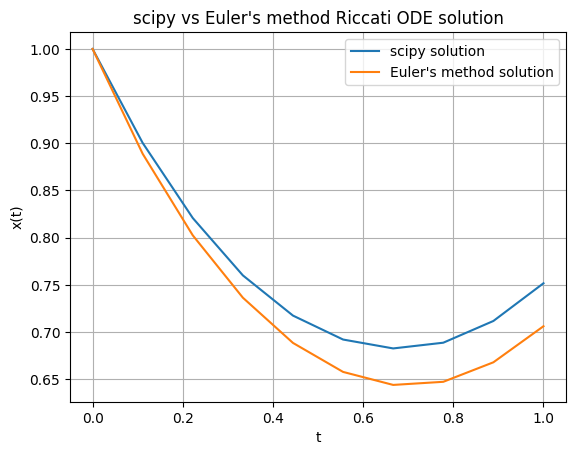

In [5]:
# Solve ODE with scipy
sol_scipy = solve_ivp(riccati, t_span, x0, t_eval=np.linspace(t0, t_end, n_steps))
t_scipy, x_scipy = sol_scipy.t, sol_scipy.y[0]

# Solve ODE with Euler's method
t_euler, x_euler = euler_method(riccati, t_span, x0, n_steps)

# Plot solutions
plt.plot(t_scipy, x_scipy, label="scipy solution")
plt.plot(t_euler, x_euler[:, 0], label="Euler's method solution")

plt.title("scipy vs Euler's method Riccati ODE solution")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.show()

## 4.2 Runge-Kutta methods

We'll begin with the Heun method, a 2-step Runge-Kutta method.

In [6]:
def heun_method(F, t_span, x0, n_steps):
    dim = len(x0)
    t0, t_end = t_span
    t_step = (t_end - t0) / (n_steps - 1)

    t = np.linspace(t0, t_end, n_steps)
    x = np.zeros((n_steps, dim))
    x[0] = x0

    for n in range(1, n_steps):
        k1 = np.array(F(t[n-1], x[n-1]))
        k2 = np.array(F(t[n], x[n-1] + t_step * k1))
        x[n] = x[n-1] + t_step * (k1 + k2) / 2

    return t, x

In [7]:
def forced_damped_oscillator(t, x, alpha=0.5, beta=1.0, omega=2.0, gamma=0.5, delta=2.5):
    Dx = -alpha * x + beta * np.cos(omega * t) + gamma * np.sin(delta * t)
    return np.array([Dx])

# Initial condition and time span
t_span = (0, 10)
t0, t_end = t_span
x0 = [3]
n_steps = 30

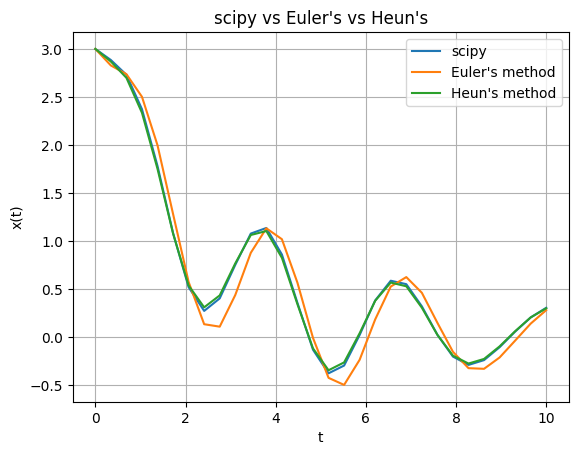

In [8]:
# Solve ODE with scipy
sol_scipy = solve_ivp(forced_damped_oscillator, t_span, x0, t_eval=np.linspace(t0, t_end, n_steps))
t_scipy, x_scipy = sol_scipy.t, sol_scipy.y[0]

# Solve ODE with Euler's method
t_euler, x_euler = euler_method(forced_damped_oscillator, t_span, x0, n_steps)

# Solve ODE with Heun's method
t_heun, x_heun = heun_method(forced_damped_oscillator, t_span, x0, n_steps)

# Plot solutions
plt.plot(t_scipy, x_scipy, label="scipy")
plt.plot(t_euler, x_euler[:, 0], label="Euler's method")
plt.plot(t_heun, x_heun[:, 0], label="Heun's method")

plt.title("scipy vs Euler's vs Heun's")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.show()

Now let's introduce the general Runge-Kutta method. It generalizes both Euler's and Huen's method.

In [9]:
def RK_method(F, t_span, x0, n_steps, a, b, c):
    dim = len(x0)
    l = len(b)
    t_start, t_end = t_span
    t_step = (t_end - t_start) / (n_steps - 1)

    t = np.linspace(t_start, t_end, n_steps)
    x = np.zeros((n_steps, dim))
    x[0] = x0
    k = np.zeros((l, dim))

    for n in range(1, n_steps):
        k[0] = F(t[n-1], x[n-1])
        for i in range(1, l):
            t_i = t[n-1] + t_step * c[i]
            x_i = x[n-1] + t_step * np.dot(a[i-1][:i], k[:i])
            k[i] = F(t_i, x_i)
        x[n] = x[n-1] + t_step * np.dot(b, k)

    return t, x

This is a well-known order 3 method. By choosing specific a, b, c you can implement Euler's and Huen's method.

In [10]:
a = np.array(
    [[0.5, 0], [-1, 2]]
)
b = np.array([1/6, 4/6, 1/6])
c = np.array([0, 0.5, 1])

[]

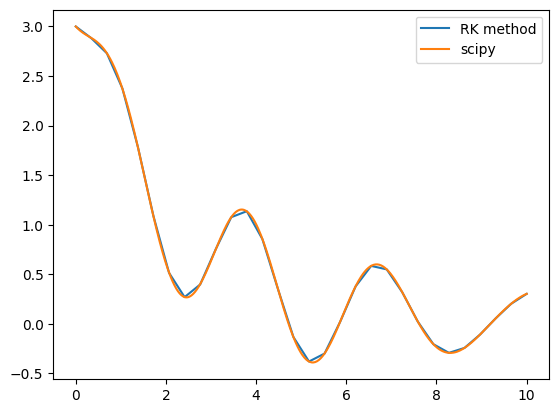

In [11]:
# Solve ODE with scipy
sol_scipy = solve_ivp(forced_damped_oscillator, t_span, x0, t_eval=np.linspace(t0, t_end, 500))
t_scipy, x_scipy = sol_scipy.t, sol_scipy.y[0]

# Solve ODE with RK
t_rk, x_rk = RK_method(forced_damped_oscillator, t_span, x0, n_steps, a, b, c)

# Plot
plt.plot(t_rk, x_rk[:, 0], label="RK method")
plt.plot(t_scipy, x_scipy, label="scipy")
plt.legend()
plt.plot()

Let's go 2 dimensional now!

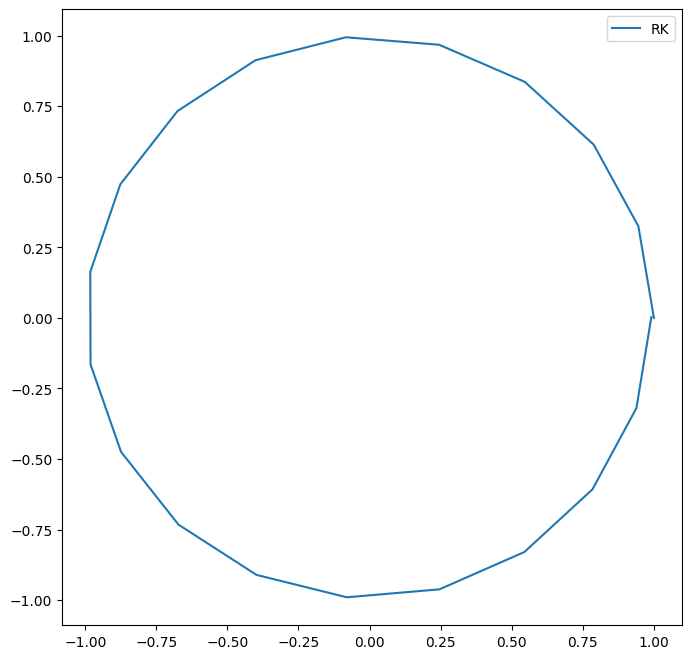

In [12]:
def circle(t, X):
    DX = [-X[1], X[0]]
    return np.array(DX)

t_span = (0, 2 * np.pi)
t0, t_end = t_span
X0 = [1, 0]
n_steps = 20

t_rk, X_rk = RK_method(circle, t_span, X0, n_steps, a, b, c)

plt.figure(figsize=(8,8))
plt.plot(X_rk[:, 0], X_rk[:, 1], label="RK")
plt.legend()
plt.show()

## Lorenz attractor

In [13]:
# Parameters of the Lorenz attractor
s, r, u = 10, 28, 8/3

def lorenz(t, X):
    x, y, z = X
    Dx = -s * x + s * y
    Dy = r * x - y - x * z
    Dz = x * y - u * z
    return np.array([Dx, Dy, Dz])

In [14]:
# Initial condition
t_span = (0, 30)
t0, t_end = t_span
X0 = [1, 0, .5]
n_steps = 3000

In [15]:
t_lorenz, x_lorenz = RK_method(lorenz, t_span, X0, n_steps, a, b, c)

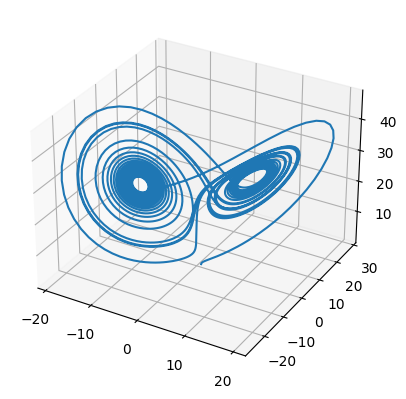

In [16]:
x, y, z = x_lorenz[:, 0], x_lorenz[:, 1], x_lorenz[:, 2]

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x, y, z)
plt.show()

I want to compare my numerical methods with the target solution from solve_ivp. Let's do it using Lorenz's equation, which is chaotic and therefore will be useful to check numerical accuracy.

This is dumb. You should check your algorithms on stiff, not chaotic, ODEs. Chaotic equations aren't good for checking numerical accuracy. 

In [ ]:
# 3-stage Runge-Kutta
def RK3(F, t_span, x0, n_steps):
    a = np.array(
        [[0.5, 0], [-1, 2]]
    )
    b = np.array([1/6, 4/6, 1/6])
    c = np.array([0, 0.5, 1])
    return RK_method(F, t_span, x0, n_steps, a, b, c)

# Classical (4-stage) Runge-Kutta
def RK4(F, t_span, x0, n_steps):
    a = np.array(
        [[0.5, 0, 0],
         [0, 0.5, 0],
         [0, 0, 1]]
    )
    b = np.array([1/6, 2/6, 2/6, 1/6])
    c = np.array([0, 0.5, 0.5, 1])
    return RK_method(F, t_span, x0, n_steps, a, b, c)

In [81]:
# Initial condition
t_span = (0, 20)
t0, t_end = t_span
X0 = [0, 1, 0.5]
n_steps = 1000
start_step = 3 * n_steps // 4

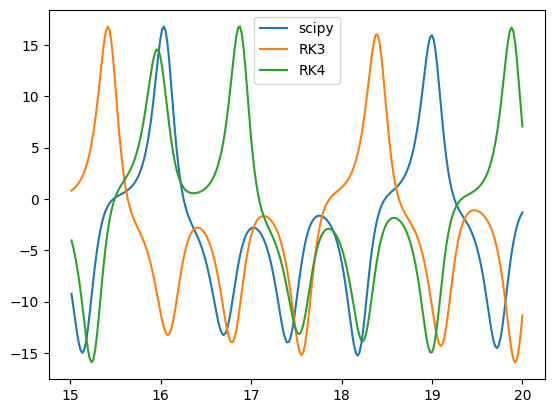

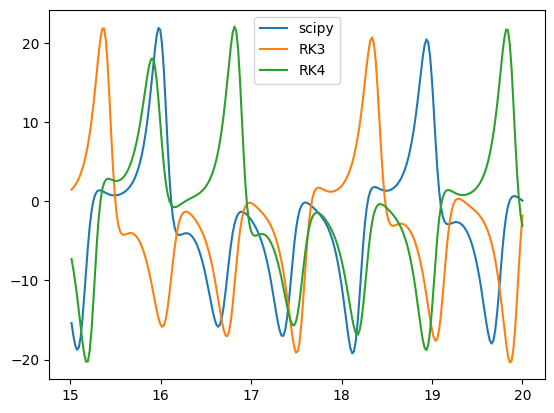

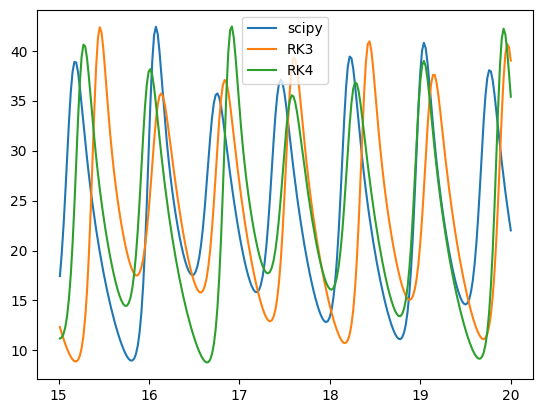

In [83]:
# scipy solution
sol_scipy = solve_ivp(lorenz, t_span, X0, t_eval=np.linspace(t0, t_end, n_steps))
t_target, x_target = sol_scipy.t, sol_scipy.y

# RK3 solution
t_rk3, x_rk3 = RK3(lorenz, t_span, X0, n_steps)

# RK4 solution
t_rk4, x_rk4 = RK4(lorenz, t_span, X0, n_steps)

_, ax1 = plt.subplots()
_, ax2 = plt.subplots()
_, ax3 = plt.subplots()

ax1.plot(t_target[start_step:], x_target[0, start_step:], label="scipy")
ax1.plot(t_rk3[start_step:], x_rk3[start_step:, 0], label='RK3')
ax1.plot(t_rk4[start_step:], x_rk4[start_step:, 0], label='RK4')

ax2.plot(t_target[start_step:], x_target[1, start_step:], label="scipy")
ax2.plot(t_rk3[start_step:], x_rk3[start_step:, 1], label='RK3')
ax2.plot(t_rk4[start_step:], x_rk4[start_step:, 1], label='RK4')

ax3.plot(t_target[start_step:], x_target[2, start_step:], label="scipy")
ax3.plot(t_rk3[start_step:], x_rk3[start_step:, 2], label='RK3')
ax3.plot(t_rk4[start_step:], x_rk4[start_step:, 2], label='RK4')

ax1.legend()
ax2.legend()
ax3.legend()

Shikata ga nai, it's totally chaotic.

## 4.4 Adams methods

Previous methods, such as Euler's and Runge-Kutta, were one-step methods -- the value of x[n+1] was determined solely by t[n] and x[n]. k-step methods use the values of the k last steps to approximate the next one.

We know that

- x(t_n) = x(t_n-1) + integral from t_n-1 to t_n of F(t,x(t)) dt

for every n. We don't know x(t), but we can interpolate F(t,x(t)) by a polynomial of degree k-1, which is determined by k points, such that p(t_j) = F(t_j,x(t_j)), for j = n-1, ...m n-k.

Thus we'll have an approximation

- x[n] = x[n-1] + integral from t_n-1 to t_n of p(t) dt

We interpolate the polynomial using Newton's backward interpolation formula and integrate the polynomial. The polynomial is

- p(t_n-1 + h * u) = delF[0][n-1] + sum from i=1 to k-1 of delF[i][n-1] * (u)_i / i!,

where (u)_i is the *Pochhammer symbol*.

This method is also know as *Adams k-step explicit method* or *Adams-Bashforth k-step method*.

Here a[i] = integral from 0 to 1 of u * (u+1) * ... * (u+i-1) / i! du

In [60]:
def compute_a_adams(k):
    # return ndarray of a[i]'s
    # which are the integral of pochhammer over i!, 0 <= i < k
    # the book gives a recursive formula to compute a[i]
    a = np.ones((k))
    for i in range(1, k):
        for j in range(i):
            a[i] -= a[j] / (i+1-j)
    return a

delF[0][j] = F(t_j, x(t_j))

delF[i, j] = delF[i-1, j] - delF[i-1, j-1]

In [61]:
def compute_delF(k, F, t, x):
    # t = [t_n-k, ..., t_n-1]
    # x = [x_n-k, ..., x_n-1]
    dim = len(x[0])
    delF = np.zeros((k, k, dim))
    for j in range(k):
        delF[0, j, :] = F(t[j], x[j])
    for i in range(1, k):
        for j in range(i, k):
            delF[i, j] = delF[i-1, j] - delF[i-1, j-1]
    return delF[:, k-1]

In [62]:
def adams_bashforth(F, t_span, x0, n_steps, k):
    dim = len(x0)
    t_start, t_end = t_span
    h = (t_end - t_start) / (n_steps - 1)

    t = np.linspace(t_start, t_end, n_steps)
    x = np.zeros((n_steps, dim))
    a = compute_a_adams(k)

    # Compute first k steps with RK
    A = np.array(
    [[0.5, 0], [-1, 2]]
    )
    B = np.array([1/6, 4/6, 1/6])
    C = np.array([0, 0.5, 1])
    _, x_first_k = RK_method(F, (t_start, t_start + h*(k-1)), x0, k, A, B, C)
    x[:k] = x_first_k

    for n in range(k, n_steps):
        delF = compute_delF(k, F, t[n-k:n], x[n-k:n])
        x[n] = x[n-1] + h * np.dot(a, delF)
    
    return t, x

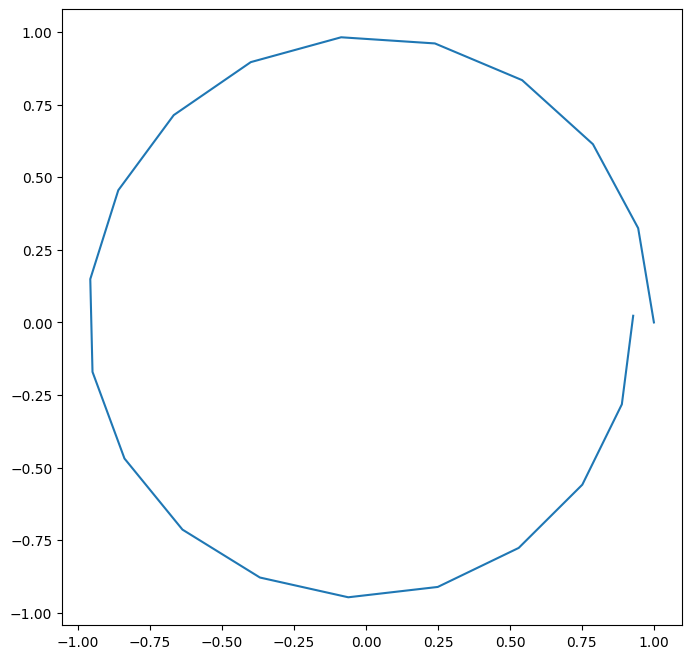

In [63]:
t, x = adams_bashforth(circle, (0, 2*np.pi), [1,0], 20, 3)

plt.figure(figsize=(8,8))
plt.plot(x[:, 0], x[:, 1], label="adams bashforth")
plt.show()

This is much worse than RK lol

## 4.6 Stiffness

I want to make a comprehensive analysis of stiffness. Maybe I should make it in another notebook, this one is becoming too long. Yeah I'll do that now.

## Experiment: level curves

Given a function f(x,y), its gradient vector field (df/dx, df/dx) is orthogonal to the level curves at each point. Equivalently, the vector field orthogonal to the gradient is tangent to the level curves. That is, the level curves of f are the integral fields of the vector field

- F(x,y) = (-df/dy, df/dx)

Thus we can approximate the level curves of f by solving the ODE determined by the vector field F.

We'll consider the family of functions

- f(x,y) = -Alogx + Bx + Clogy - Dy

In [64]:
A, B, C, D = -1, -1, 1, 1

# Experiment function
def exp_F(t, X):
    x, y = X[0], X[1]
    return np.array([D - C/y, B - A/x])

t_span = (0, 50)
n_steps = 500

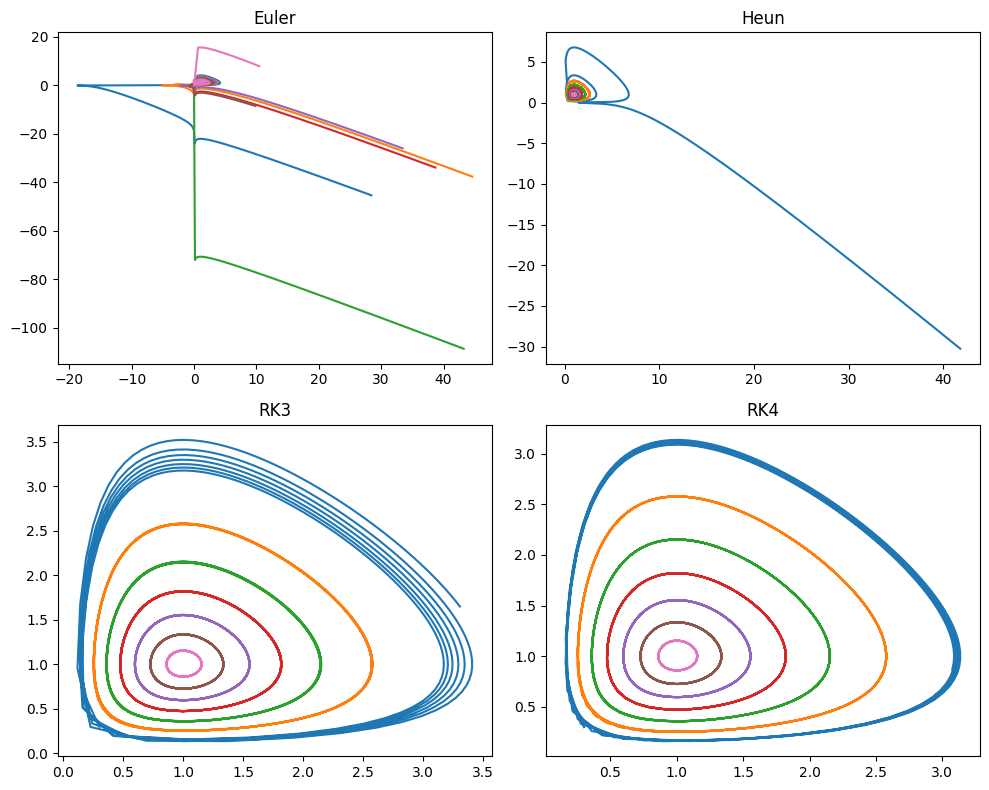

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].set_title("Euler")
axs[0, 1].set_title("Heun")
axs[1, 0].set_title("RK3")
axs[1, 1].set_title("RK4")

for i in range(7):
    # Define initial condition
    X0 = [0.3 + i/10, 0.3+i/10]

    # Compute solutions for all methods
    _, x_euler = euler_method(exp_F, t_span, X0, n_steps)
    _, x_heun = heun_method(exp_F, t_span, X0, n_steps)
    _, x_rk3 = RK3(exp_F, t_span, X0, n_steps)
    _, x_rk4 = RK4(exp_F, t_span, X0, n_steps)

    # Add solutions to plots
    axs[0, 0].plot(x_euler[:, 0], x_euler[:, 1])
    axs[0, 1].plot(x_heun[:, 0], x_heun[:, 1])
    axs[1, 0].plot(x_rk3[:, 0], x_rk3[:, 1])
    axs[1, 1].plot(x_rk4[:, 0], x_rk4[:, 1])

plt.tight_layout()
plt.show()